## Assignment A1b: Functions and Computation

### John Mays, jkm100

In [1]:
# Appropriate Libraries for the notebook:
import numpy as np
import wave

In [2]:
import A1b_code  # <----- where all of my functions are written

### 1. Common functions

### 1a. sinewave

In [3]:
#testing
A1b_code.sinewave(0.0, f=5, d=0.05)

1.0

##### A quick graph:

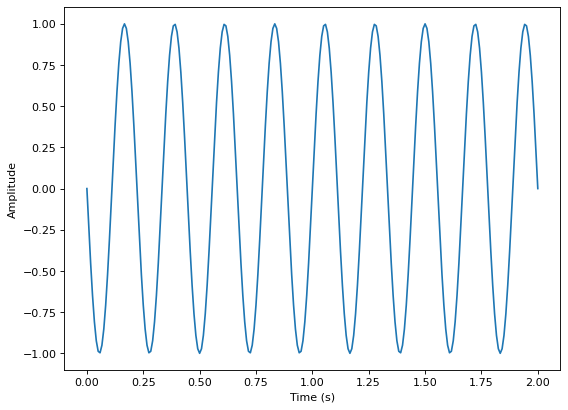

In [4]:
t_120Hz = np.linspace(0,2,num=120*2+1) # 120Hz denotes sampling rate
A1b_code.plot_sinewave(t_120Hz, f=4.5, d= 1.0)

#### 1)
Formula: 

$\text{time}\times f_{s} = i$

Unit Analysis:

$\text{seconds} \times \text{Hz}= \text{seconds} \times \frac{\text{samples}}{\text{second}}= \text{samples}$

#### 2)
Formula:

$-\text{delay} \times f_{s} \times 2\pi = \text{phase} = \phi$

Unit Analysis:

$\text{seconds} \times \frac{\text{cycles}}{\text{second}} \times \frac{\text{radians}}{\text{second}} = \text{radians}$


##### Another quick graph:

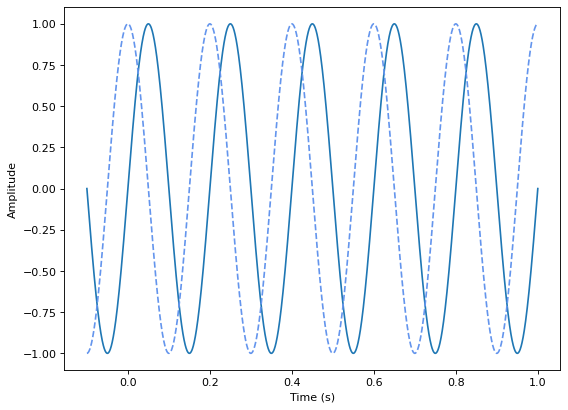

In [5]:
t_1000Hz = np.linspace(-0.1,1.0,num=1000*2+1) # 1000Hz denotes sampling rate
A1b_code.plot_delayed_sinewave(t_1000Hz, f=4.5, d=0.05)

### 1b. gabor

In [6]:
#testing
A1b_code.gaboro(-3, f=0.0625, sigma=8)

0.8611504148937256

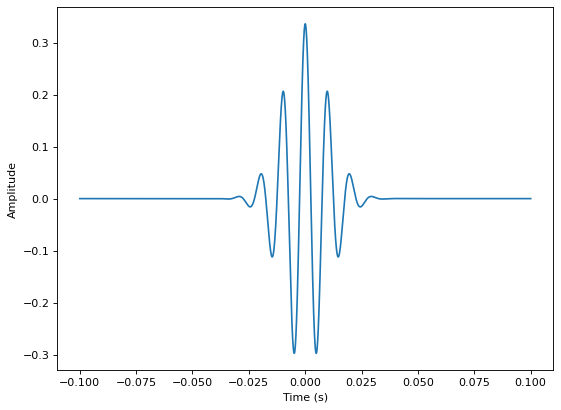

In [7]:
# setting up the function's arguments
fs = 1000 #1000 Hz
sigma = 1/100
f = 100
t = np.linspace(-.1, .1, num=2*1000*fs+1)
norm = A1b_code.gabore_norm(fs=1000, sigma=sigma, f=f)

# plotting the function
A1b_code.plot_gabor(t, sigma=sigma,f=100, a=1/norm)

### 1c. gammatone

In [8]:
#testing
A1b_code.gammatone(0.01, f=100)

1.0

##### A quick graph:

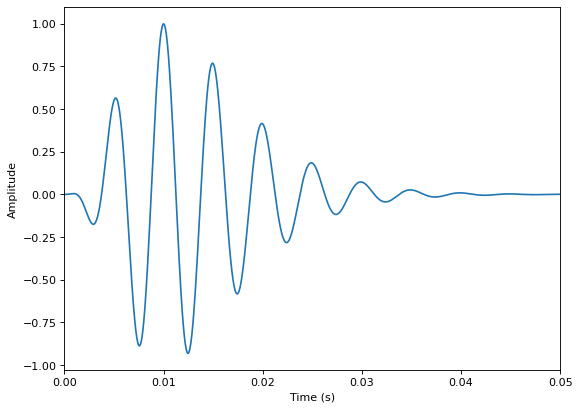

In [9]:
t_20000Hz = np.linspace(0,1,num=20000*1+1) # 20000Hz denotes sampling rate
A1b_code.plot_gammatone(t_20000Hz, f=200.0, xlim = (0.00, 0.05))

### 2. Simple computation

### 2a. localmaxima

In [10]:
# testing
print(A1b_code.localmaxima([1, 3, 2, -2, 2, 4, 8, 6])) 
# should return the indices of the local maxima

[1, 6]


##### An illustrative graph:

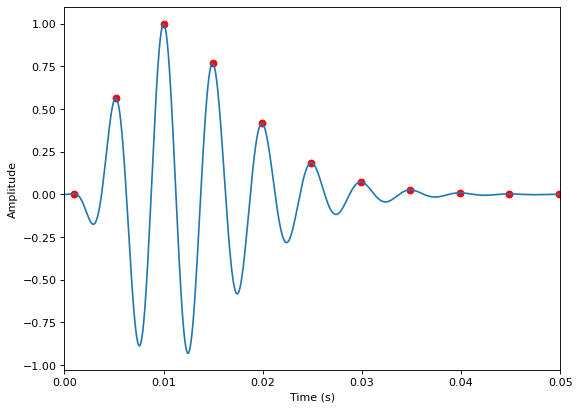

In [11]:
# First, setting up t for an old gammatone function:
t_20000Hz = np.linspace(0,1,num=20000*1+1) # 20000Hz denotes sampling rate
gammatone_vals = A1b_code.gammatone(t_20000Hz, f=200.0)

# then, getting the local maxima so I can graph them:

local_maxima_indices = A1b_code.localmaxima(gammatone_vals)
local_maxima_times = []
local_maxima_values = []
for index in local_maxima_indices:
    local_maxima_times.append(t_20000Hz[index])
    local_maxima_values.append(gammatone_vals[index])

A1b_code.plot_local_maxima(t=t_20000Hz, fn_vals=gammatone_vals,\
lm_t=local_maxima_times,lm_vals=local_maxima_values,\
xlim = (0.00, 0.05))

### 2b. crossings


##### A graph:

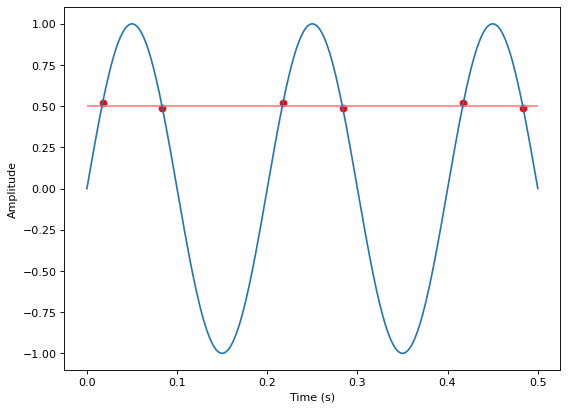

In [12]:
# setting up a plottable function with a list of t values
# and a list of sine values
t_200Hz = np.linspace(0,0.5,num=200*2+1) # 200Hz denotes sampling rate
sine_vals = A1b_code.sinewave(t_200Hz, f=5, d= 1.0)

# then, getting the crossing points so I can graph them
crossings_indices = A1b_code.crossings(sine_vals, 0.5, dir="both")
crossings_times = []
crossings_vals = []
for index in crossings_indices:
    crossings_times.append(t_200Hz[index])
    crossings_vals.append(sine_vals[index])

A1b_code.plot_crossings(t_200Hz, sine_vals, crossings_times,\
crossings_vals, threshold=0.5)


### 2c. envelope

In [13]:
#reading in the speech.wav file
speech = wave.open('speech.wav', mode='rb')
speech_data = speech.readframes(speech.getnframes())
speech_data = list(speech_data)

##### Plotting a segment of speech.wav

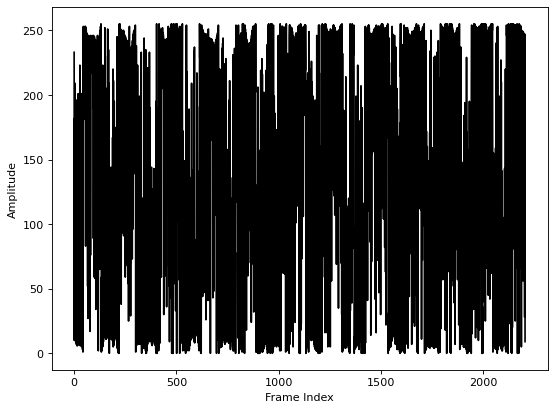

In [14]:
framerate = speech.getframerate()
cut_speech_data = speech_data[round(3.0*framerate):round(3.1 * framerate)]
A1b_code.plot_raw_audio(cut_speech_data)

##### Plotting the entire speech.wav with an envelope

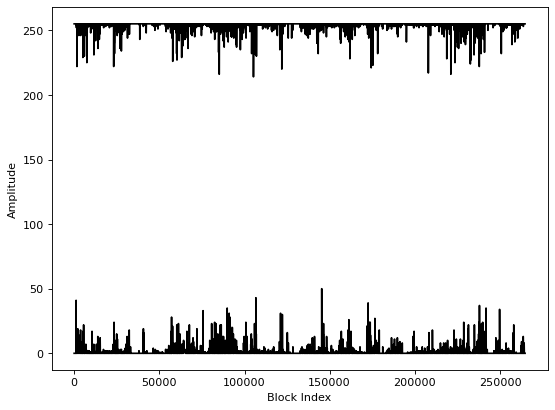

In [15]:
y_lower, y_upper, block_indices = A1b_code.envelope(speech_data, 5000)
A1b_code.plot_envelope(y_lower, y_upper, block_indices)